<a href="https://colab.research.google.com/github/gvalexis/cagv_pcd/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams
import requests
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
import kagglehub
import numpy as np

In [2]:
path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")
nltk.download('stopwords')
nltk.download('punkt_tab')

100%|██████████| 1.29G/1.29G [00:21<00:00, 65.3MB/s]

Extracting files...



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [32]:
resenass = pd.read_csv("/root/.cache/kagglehub/datasets/kritanjalijain/amazon-reviews/versions/2/test.csv")
resenass.head()

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...


In [4]:
resenass.columns = ["n","short_review","long_review"]
resenass["tokens"] = resenass["long_review"]+" "+resenass["long_review"]
resenass=resenass.drop(columns=["n","long_review","short_review"])
resenass.head()

,tokens
0,Despite the fact that I have only played a sma...
1,I bought this charger in Jul 2003 and it worke...
2,Check out Maha Energy's website. Their Powerex...
3,Reviewed quite a bit of the combo players and ...
4,I also began having the incorrect disc problem...


In [5]:
resenass=resenass.sample(10000)
resenass.reset_index(drop=True, inplace=True)

In [6]:
def tokenizar(txt):
    texto_limpio = re.sub(r'[^\w\s]', '', txt.lower())

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

In [7]:
resenass['token'] = resenass['tokens'].apply(lambda x : tokenizar(x))

In [8]:
df_tokens_res = resenass.explode(column='token')
df_tokens_res.head()

In [33]:
df_tokens_res.head()

,tokens,token
0,"I bought the Poulan Pro 2 Summer's ago, and it...",bought
0,"I bought the Poulan Pro 2 Summer's ago, and it...",poulan
0,"I bought the Poulan Pro 2 Summer's ago, and it...",pro
0,"I bought the Poulan Pro 2 Summer's ago, and it...",2
0,"I bought the Poulan Pro 2 Summer's ago, and it...",summers


In [34]:
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.sample(10)

,termino,sentimiento
3094,tyrannic,-3
2639,sabotage,-2
241,authority,1
2929,succeeding,3
2506,refine,1
175,apologizes,-1
225,atrocity,-3
1313,flagship,2
1276,favourably,2
585,conflicting,-2


In [10]:
df_sent = pd.merge(df_tokens_res, lexicon, how='left', left_on='token', right_on='termino').groupby('tokens').sentimiento.mean().reset_index().sort_values(by='sentimiento', ascending=False).dropna()

In [35]:
df_sent.sample(10)

,tokens,sentimiento
212,AS A FUTURE MEDICAL PROFESSIONAL I THINK THAT ...,0.857143
1774,I am a native Portuguese speaker and I bought ...,1.000000
8225,This is way the best sammy hagar era van halen...,2.583333
1449,Great book. Explains tech terms. Ties in evolu...,2.000000
1041,Don't be seduced by Pinkermania; he's trapped ...,-0.333333
28,"""The Van"" is one of my favorite books, but I r...",0.000000
5414,My flock of lovebirds love Harrison's products...,1.500000
6968,The toaster has an adjustment for dark to ligh...,-0.333333
4934,"It's not the worst Beatles covers ever, but th...",-0.285714
3517,I purchased the flag as a replacement for one ...,2.333333


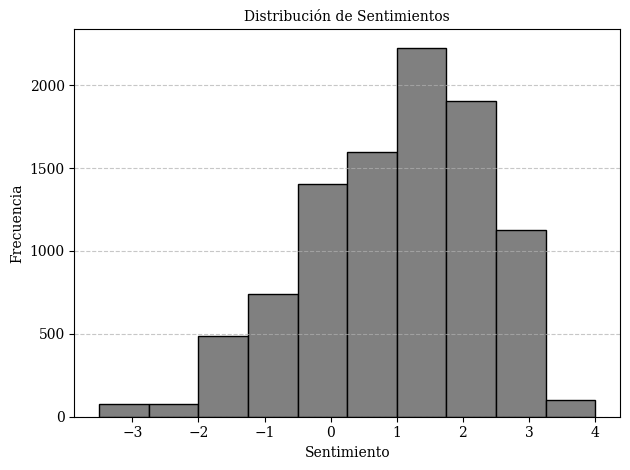

In [39]:
ax = df_sent[["sentimiento"]].hist(color='gray', edgecolor='black', grid=False)

plt.title('Distribución de Sentimientos', fontsize=10, fontname='Serif')
plt.xlabel('Sentimiento', fontsize=10, fontname='Serif')
plt.ylabel('Frecuencia', fontsize=10, fontname='Serif')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fontsize=10, fontname='Serif')
plt.yticks(fontsize=10, fontname='Serif')
plt.tight_layout()

plt.savefig('histograma_sentimientos.pdf', format='pdf')
plt.show()


In [38]:

plt.savefig('histograma_sentimientos.pdf', format='pdf')

<Figure size 640x480 with 0 Axes>

,tokens,sentimiento
7409,"This book is a wonderful guide for prayer, ref...",4.000000
5619,"Not high tech, but a lot of fun. Just plug int...",4.000000
7391,This book is a fun one to just chill and read....,4.000000
9583,did not think i would use the cover but it is ...,4.000000
5574,Nicholas Sparks is an amazing writer. I will r...,4.000000
...,...,...
8441,This product is worthless!They place the stick...,-3.000000
5590,No kidding!! The shipping charge on these batt...,-3.000000
6615,The description of the product was deceiving. ...,-3.000000
6160,"Snoop always talks about crip life, shooting p...",-3.333333



Media: 0.9326634535859145
Mediana: 1.0
Moda: 2.0
Desviación Estándar: 1.336778668614437


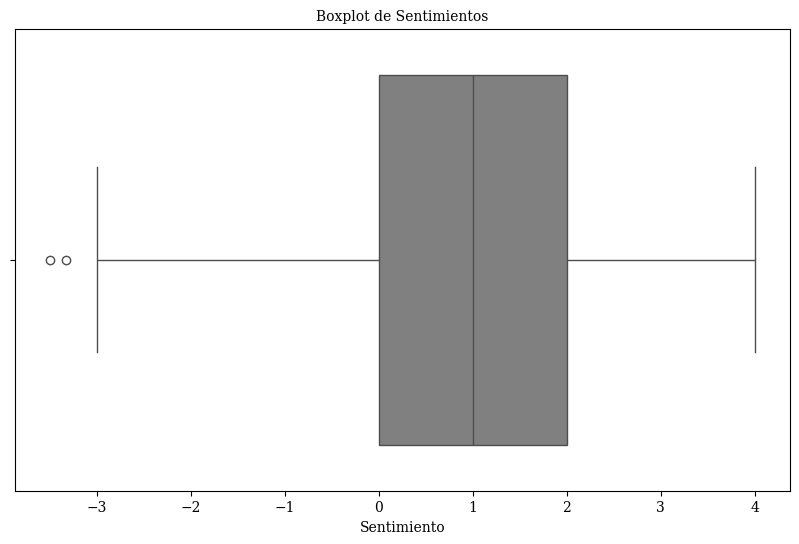

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

media = df_sent['sentimiento'].mean()
print(f"\nMedia: {media}")

# Mediana
mediana = df_sent['sentimiento'].median()
print(f"Mediana: {mediana}")

# Moda
moda = df_sent['sentimiento'].mode()[0]
print(f"Moda: {moda}")

# Desviación estándar
desviacion_estandar = df_sent['sentimiento'].std()
print(f"Desviación Estándar: {desviacion_estandar}")


# Boxplot
plt.figure(figsize=(10, 6))
plt.xticks(fontsize=10, fontname='Serif')
plt.yticks(fontsize=10, fontname='Serif')
sns.boxplot(x=df_sent['sentimiento'],color='gray')
plt.title('Boxplot de Sentimientos',fontsize=10, fontname='Serif')
plt.xlabel('Sentimiento',fontsize=10, fontname='Serif')

plt.savefig('Boxplot_de_Sentimientos.pdf', format='pdf')
plt.show()